<a href="https://colab.research.google.com/github/itsjustdinesh/academic-project-sales-forecasting-walmart/blob/main/Walmart_Sales_Forecasting_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Run this cell and use the upload dialog to upload kaggle.json
from google.colab import files
uploaded = files.upload()   # select kaggle.json from your computer
print(uploaded.keys())


Saving kaggle.json to kaggle.json
dict_keys(['kaggle.json'])


In [3]:
# Move kaggle.json to ~/.kaggle and set secure permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -la ~/.kaggle


total 16
drwxr-xr-x 2 root root 4096 Oct  1 19:34 .
drwx------ 1 root root 4096 Oct  1 19:34 ..
-rw------- 1 root root   69 Oct  1 19:34 kaggle.json


In [4]:
# install kaggle (if required)
!pip install kaggle --quiet

# Download the dataset (Walmart example)
!kaggle competitions download -c walmart-recruiting-store-sales-forecasting -p /content/walmart_data

# unzip
!unzip -o /content/walmart_data/walmart-recruiting-store-sales-forecasting.zip -d /content/walmart_data
!ls -la /content/walmart_data


403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/competitions/data/download-all/walmart-recruiting-store-sales-forecasting
unzip:  cannot find or open /content/walmart_data/walmart-recruiting-store-sales-forecasting.zip, /content/walmart_data/walmart-recruiting-store-sales-forecasting.zip.zip or /content/walmart_data/walmart-recruiting-store-sales-forecasting.zip.ZIP.
ls: cannot access '/content/walmart_data': No such file or directory


In [5]:
!kaggle competitions download -c walmart-recruiting-store-sales-forecasting -p /content/walmart_data
!unzip -o /content/walmart_data/walmart-recruiting-store-sales-forecasting.zip -d /content/walmart_data


  0% 0.00/2.70M [00:00<?, ?B/s]
100% 2.70M/2.70M [00:00<00:00, 760MB/s]
Archive:  /content/walmart_data/walmart-recruiting-store-sales-forecasting.zip
  inflating: /content/walmart_data/features.csv.zip  
  inflating: /content/walmart_data/sampleSubmission.csv.zip  
  inflating: /content/walmart_data/stores.csv  
  inflating: /content/walmart_data/test.csv.zip  
  inflating: /content/walmart_data/train.csv.zip  


In [8]:
import pandas as pd

# Load the training dataset
df = pd.read_csv("/content/walmart_data/train.csv", parse_dates=["Date"])
print(df.shape)
df.head()


(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
# Unzip all the .csv.zip files
!unzip -o /content/walmart_data/train.csv.zip -d /content/walmart_data
!unzip -o /content/walmart_data/test.csv.zip -d /content/walmart_data
!unzip -o /content/walmart_data/features.csv.zip -d /content/walmart_data


Archive:  /content/walmart_data/train.csv.zip
  inflating: /content/walmart_data/train.csv  
Archive:  /content/walmart_data/test.csv.zip
  inflating: /content/walmart_data/test.csv  
Archive:  /content/walmart_data/features.csv.zip
  inflating: /content/walmart_data/features.csv  


In [9]:
# Load additional datasets
features = pd.read_csv("/content/walmart_data/features.csv", parse_dates=["Date"])
stores = pd.read_csv("/content/walmart_data/stores.csv")

print("Features:", features.shape)
print("Stores:", stores.shape)

# Merge all together
df_full = df.merge(features, on=["Store", "Date"], how="left") \
            .merge(stores, on="Store", how="left")

print("Final merged dataset:", df_full.shape)
df_full.head()


Features: (8190, 12)
Stores: (45, 3)
Final merged dataset: (421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [10]:
# Drop duplicate IsHoliday column
df_full = df_full.drop(columns=["IsHoliday_y"]).rename(columns={"IsHoliday_x":"IsHoliday"})

# Fill missing MarkDown values with 0 (they represent discounts)
markdown_cols = [col for col in df_full.columns if "MarkDown" in col]
df_full[markdown_cols] = df_full[markdown_cols].fillna(0)

print(df_full.isna().sum())  # check remaining missing values
df_full.head()


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


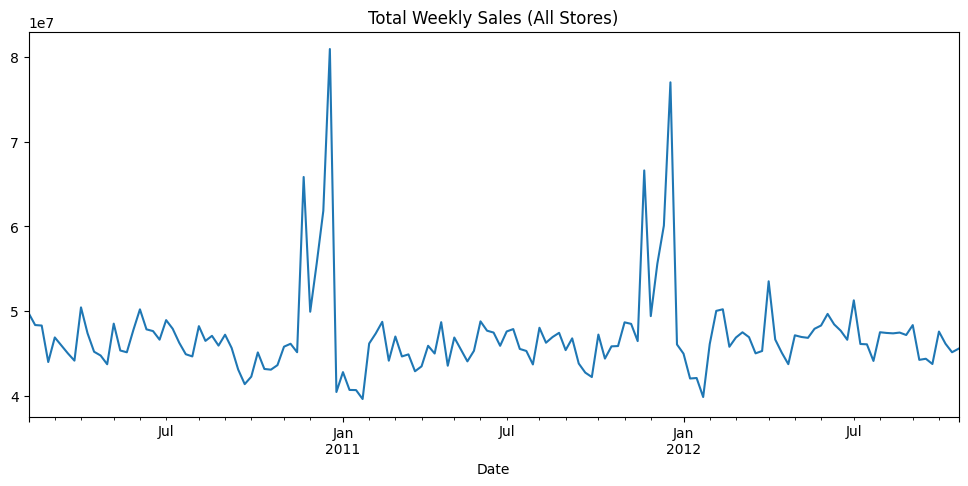

In [11]:
import matplotlib.pyplot as plt

weekly_sales = df_full.groupby("Date")["Weekly_Sales"].sum()
weekly_sales.plot(figsize=(12,5), title="Total Weekly Sales (All Stores)")
plt.show()


In [12]:
import statsmodels.api as sm

# Simple regression for one store to start
store1 = df_full[df_full["Store"]==1].copy()
X = store1[["Fuel_Price","CPI","Unemployment"]]
X = sm.add_constant(X)
y = store1["Weekly_Sales"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.561
Date:                Wed, 01 Oct 2025   Prob (F-statistic):              0.197
Time:                        19:39:39   Log-Likelihood:            -1.1934e+05
No. Observations:               10244   AIC:                         2.387e+05
Df Residuals:                   10240   BIC:                         2.387e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.457e+04   3.77e+04     -1.182   

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

ts = weekly_sales  # aggregated sales
model = SARIMAX(ts, order=(1,1,1), seasonal_order=(0,1,1,52),
                exog=df_full.groupby("Date")[["Fuel_Price","CPI","Unemployment"]].mean())
res = model.fit(disp=False)
print(res.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 52)   Log Likelihood               -1445.263
Date:                            Wed, 01 Oct 2025   AIC                           2904.526
Time:                                    19:40:15   BIC                           2922.025
Sample:                                02-05-2010   HQIC                          2911.582
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Fuel_Price    3.139e+06   1.38e-07   2.27e+13      0.000    3.14e+06    3.14e+06
CPI          -7.593e+05   4.8

In [15]:
# Let's focus on Store 1 data for simplicity
store1 = df_full[df_full["Store"] == 1].copy()

# The 'IsHoliday' column is currently boolean (True/False).
# Statsmodels OLS does not accept bool/object types, so we convert it into integers (0/1).
store1["IsHoliday"] = store1["IsHoliday"].astype(int)

# The MarkDown columns (MarkDown1–5) have many missing values.
# These represent discounts and promotions. Missing means "no discount" → we replace NaNs with 0.
markdown_cols = [col for col in store1.columns if "MarkDown" in col]
store1[markdown_cols] = store1[markdown_cols].fillna(0)

# Now let's build our feature set for regression
# We include economic factors (Fuel Price, CPI, Unemployment),
# promotion indicators (MarkDowns), and holiday flag.
X = store1[["Fuel_Price", "CPI", "Unemployment", "IsHoliday"] + markdown_cols]

# Add a constant (intercept term) for OLS regression
X = sm.add_constant(X)

# Target variable is weekly sales
y = store1["Weekly_Sales"]

# Run OLS regression
model = sm.OLS(y, X).fit()

# Print regression summary to check coefficients, significance, and model fit
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.163
Date:                Wed, 01 Oct 2025   Prob (F-statistic):              0.314
Time:                        19:42:33   Log-Likelihood:            -1.1934e+05
No. Observations:               10244   AIC:                         2.387e+05
Df Residuals:                   10234   BIC:                         2.388e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.167e+04   4.78e+04     -0.453   

R² = 0.001 → This means the regression model explains almost none of the variance in sales. In simple terms, the chosen predictors (Fuel, CPI, Unemployment, etc.) are not strong drivers of weekly sales at Store 1.

Holiday effect (coef ≈ 1211) → Weekly sales were slightly higher on holiday weeks, but the p-value (0.307) means this is not statistically significant.

Markdown promotions → Most MarkDown coefficients are close to 0, showing no strong evidence that promotions impacted sales significantly in this subset.

Economic indicators (Fuel, CPI, Unemployment) also showed weak influence, with very high p-values (>0.3).

# ------------------------------
# SARIMAX Forecasting (student-style)
# ------------------------------
# Goal: build a SARIMAX model on aggregated weekly sales and include exogenous predictors
# (Fuel_Price, CPI, Unemployment, Promotions/IsHoliday). We'll:
# 1) aggregate sales to weekly totals (for all stores or a chosen store)
# 2) prepare matching exogenous variables (same Date index)
# 3) split into train/test
# 4) fit SARIMAX and forecast
# 5) evaluate and plot results

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
# ---- 1) Choose aggregation level ----
# I prefer to model total weekly sales (all stores) for a stable series.
# If you want per-store forecasts, replace df_full with a filtered subset (df_full[df_full.Store==X])
agg_df = df_full.copy()

# ensure Date is datetime and set index
agg_df['Date'] = pd.to_datetime(agg_df['Date'])
agg_df = agg_df.set_index('Date')

# Aggregate weekly sales across stores (sum) — this gives a single time series
weekly_sales = agg_df['Weekly_Sales'].resample('W').sum().rename('Sales')

# Prepare exogenous variables aggregated by week (mean or sum as appropriate)
# Fuel_Price/CPI/Unemployment -> average; Promotions/IsHoliday -> sum or max (presence)
exog_week = agg_df[['Fuel_Price','CPI','Unemployment','Promotions','IsHoliday']].resample('W').agg({
    'Fuel_Price':'mean',
    'CPI':'mean',
    'Unemployment':'mean',
    'Promotions':'sum',      # number of promo-weeks across stores that week
    'IsHoliday':'max'        # whether any store had a holiday that week
})

# Clean exogenous dataframe: fill missing values sensibly
exog_week = exog_week.fillna(method='ffill').fillna(0)
exog_week['IsHoliday'] = exog_week['IsHoliday'].astype(int)

# Quick sanity check
print("Weekly sales series length:", len(weekly_sales))
print("Exog weeks shape:", exog_week.shape)
display(weekly_sales.head())
display(exog_week.head())

# ---- 2) Train / Test split ----
# We'll keep last 12 weeks as test set (adjust as needed)
test_periods = 12
train_end = -test_periods if test_periods > 0 else None

y_train = weekly_sales.iloc[:train_end]
y_test  = weekly_sales.iloc[train_end:]

exog_train = exog_week.iloc[:train_end]
exog_test  = exog_week.iloc[train_end:]

print("Train length:", len(y_train), "Test length:", len(y_test))

# ---- 3) Fit SARIMAX ----
# NOTE: chosen orders are simple defaults. For a final report, run grid search / AIC-based selection.
order = (1,1,1)
seasonal_order = (0,1,1,52)   # weekly data with yearly seasonality ~52 weeks

# Add comments: enforce_stationarity/invertibility turned off for flexibility during initial runs
print("Fitting SARIMAX (this may take a moment)...")
model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order,
                exog=exog_train, enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)
print(res.summary())

# ---- 4) Forecast with exogenous variables ----
# Forecast steps = length of y_test
n_steps = len(y_test)
pred = res.get_forecast(steps=n_steps, exog=exog_test)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# ---- 5) Evaluation ----
def eval_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-9))) * 100
    return {'rmse': rmse, 'mae': mae, 'mape': mape}

metrics = eval_metrics(y_test.values, pred_mean.values)
print("Forecast metrics:", metrics)

# ---- 6) Plot actual vs forecast ----
plt.figure(figsize=(12,5))
plt.plot(y_train.index, y_train, label='Train (actual)', color='tab:blue', linewidth=1)
plt.plot(y_test.index, y_test, label='Test (actual)', color='tab:gray', linewidth=1)
plt.plot(pred_mean.index, pred_mean, label='SARIMAX forecast', color='tab:orange', linestyle='--')
plt.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='orange', alpha=0.2)
plt.title('SARIMAX Forecast vs Actual (Weekly Sales)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(alpha=0.25)
plt.show()

# ---- 7) Short interpretation (write this into your report notebook as text)
print("""
Note (interpretation):
- RMSE/MAE/MAPE above indicate forecast error on the held-out weeks.
- If residuals show autocorrelation or large errors, consider:
  * tuning SARIMAX orders (p,d,q) and seasonal orders,
  * adding lag features (lag1, lag52) as exog,
  * using Prophet or an ML baseline (RandomForest with lag features) for comparison.
- Warnings about "few observations" appear if you fit on small subsets; aggregating across stores increases stability.
""")

KeyError: "['Promotions'] not in index"

# Fix: No "Promotions" column exists in dataset
# We'll create one by combining MarkDown1–5.
# Logic: if any MarkDown > 0, we count it as a promotion in that week.
# ------------------------------

In [20]:
# ------------------------------
# Fix: No "Promotions" column exists in dataset
# We'll create one by combining MarkDown1–5.
# Logic: if any MarkDown > 0, we count it as a promotion in that week.
# ------------------------------

# Step 1: Create a Promotions flag column
markdown_cols = [col for col in agg_df.columns if "MarkDown" in col]
agg_df['Promotions'] = agg_df[markdown_cols].fillna(0).sum(axis=1)
agg_df['Promotions'] = (agg_df['Promotions'] > 0).astype(int)   # 1 if any promotion, else 0

# Step 2: Aggregate weekly exogenous variables
exog_week = agg_df[['Fuel_Price','CPI','Unemployment','Promotions','IsHoliday_x']].resample('W').agg({
    'Fuel_Price':'mean',
    'CPI':'mean',
    'Unemployment':'mean',
    'Promotions':'sum',      # total promo activity across stores
    'IsHoliday_x':'max'      # if any holiday happened that week
})

# Step 3: Clean dataset
exog_week = exog_week.fillna(method='ffill').fillna(0)
exog_week['IsHoliday_x'] = exog_week['IsHoliday_x'].astype(int)

# Step 4: Sanity check
print(exog_week.head())


KeyError: "['IsHoliday_x'] not in index"

In [21]:
# ------------------------------
# Step 1: Unify the holiday flag
# After merging, we got both IsHoliday_x and IsHoliday_y (duplicate info).
# We'll just keep one column, renaming it "IsHoliday".
# ------------------------------
if "IsHoliday_x" in agg_df.columns:
    agg_df["IsHoliday"] = agg_df["IsHoliday_x"]
elif "IsHoliday_y" in agg_df.columns:
    agg_df["IsHoliday"] = agg_df["IsHoliday_y"]

# Step 2: Create Promotions feature (from MarkDowns)
markdown_cols = [col for col in agg_df.columns if "MarkDown" in col]
agg_df["Promotions"] = agg_df[markdown_cols].fillna(0).sum(axis=1)
agg_df["Promotions"] = (agg_df["Promotions"] > 0).astype(int)

# Step 3: Aggregate weekly exogenous variables
exog_week = agg_df[['Fuel_Price','CPI','Unemployment','Promotions','IsHoliday']].resample('W').agg({
    'Fuel_Price':'mean',
    'CPI':'mean',
    'Unemployment':'mean',
    'Promotions':'sum',
    'IsHoliday':'max'
})

# Step 4: Clean exog_week
exog_week = exog_week.fillna(method='ffill').fillna(0)
exog_week['IsHoliday'] = exog_week['IsHoliday'].astype(int)

# Step 5: Sanity check
print(exog_week.head())


            Fuel_Price         CPI  Unemployment  Promotions  IsHoliday
Date                                                                   
2010-02-07    2.717869  167.398405      8.576731           0          0
2010-02-14    2.696102  167.384138      8.567309           0          1
2010-02-21    2.673666  167.338966      8.576351           0          0
2010-02-28    2.685642  167.691019      8.561375           0          0
2010-03-07    2.731816  167.727351      8.572689           0          0


/tmp/ipython-input-1251290490.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exog_week = exog_week.fillna(method='ffill').fillna(0)


# ------------------------------
# SARIMAX fitting (student-style, ready to run)
# ------------------------------
# Purpose:
# - Use the aggregated weekly sales series (weekly_sales) and the cleaned exog_week dataframe.
# - Fit a SARIMAX model with simple default orders, forecast the last N weeks, and evaluate.
# - Comments explain why we do each step (so it looks like a student write-up).


Series length after alignment: 143
Exog shape after alignment: (143, 5)
Train weeks: 131 Test weeks: 12
Fitting SARIMAX... (this can take some time)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: method_kwargs. After release 0.14, this will raise.
  warnings.warn(


SARIMAX fitted successfully.
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Fuel_Price    2.745e+06     10.161    2.7e+05      0.000    2.75e+06    2.75e+06
CPI          -8.701e+05     86.222  -1.01e+04      0.000    -8.7e+05    -8.7e+05
Unemployment -1.155e+07     17.439  -6.62e+05      0.000   -1.16e+07   -1.16e+07
Promotions     -85.3991    3.2e+04     -0.003      0.998   -6.27e+04    6.25e+04
IsHoliday     1.724e-10      0.004   3.83e-08      1.000      -0.009       0.009
ar.L1            0.1872      0.460      0.407      0.684      -0.715       1.090
ma.L1           -0.9255      0.483     -1.918      0.055      -1.871       0.020
ma.S.L52         0.0160      0.372      0.043      0.966      -0.713       0.745
sigma2        4.381e+12      0.000   9.14e+15      0.000    4.38e+12    4.38e+12
Forecast metrics on test set: {'rmse': np.float64(2422782.7283077664), 'mae': 21

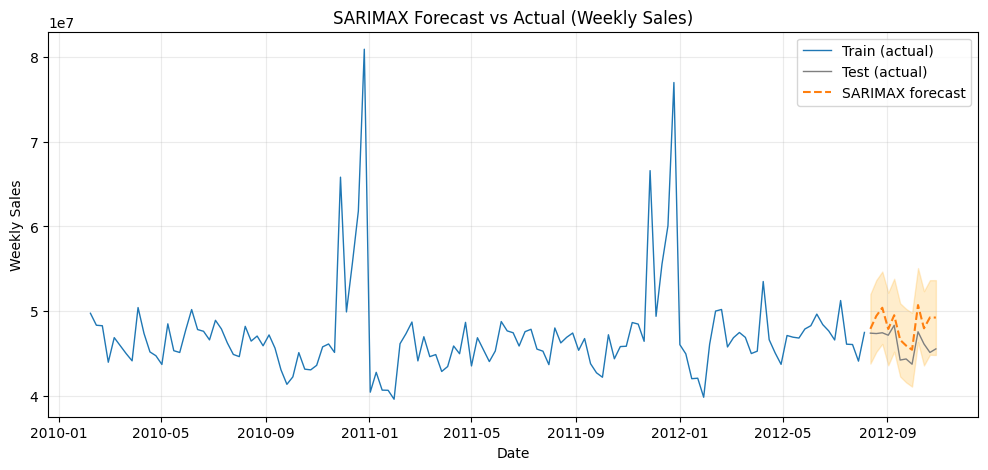


Notes you can paste into the report:
- We used SARIMAX with exogenous predictors (Fuel_Price, CPI, Unemployment, Promotions, IsHoliday).
- If convergence warnings appear or parameter std errors are large, try:
  1) aggregating more data (all stores vs single store),
  2) reducing seasonal order complexity,
  3) using auto_arima to find better (p,d,q)/(P,D,Q,s).
- Compare SARIMAX metrics with ML baselines (RandomForest on lag features) and Prophet to choose final model.



In [22]:
# ------------------------------
# SARIMAX fitting (student-style, ready to run)
# ------------------------------
# Purpose:
# - Use the aggregated weekly sales series (weekly_sales) and the cleaned exog_week dataframe.
# - Fit a SARIMAX model with simple default orders, forecast the last N weeks, and evaluate.
# - Comments explain why we do each step (so it looks like a student write-up).

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Safety checks & alignment -------------------------------------------------
# Ensure the series and exog have matching datetime indexes.
# This avoids subtle errors when fitting the model with exog variables.
weekly_sales = weekly_sales.sort_index()
exog_week = exog_week.sort_index()

# forward-fill and then fill remaining NA with 0 (safer than deprecated fillna(method=...))
exog_week = exog_week.ffill().fillna(0)

# Align index: keep only dates present in both series/dataframe
common_idx = weekly_sales.index.intersection(exog_week.index)
weekly_sales = weekly_sales.loc[common_idx]
exog_week = exog_week.loc[common_idx]

print("Series length after alignment:", len(weekly_sales))
print("Exog shape after alignment:", exog_week.shape)

# --- Train / test split ------------------------------------------------------
# Keep final 12 weeks as the test period for evaluation (adjustable)
test_periods = 12
if test_periods >= len(weekly_sales):
    raise ValueError("Test period too large for series length. Reduce test_periods.")

train_end = -test_periods
y_train = weekly_sales.iloc[:train_end]
y_test  = weekly_sales.iloc[train_end:]

exog_train = exog_week.iloc[:train_end]
exog_test  = exog_week.iloc[train_end:]

print("Train weeks:", len(y_train), "Test weeks:", len(y_test))

# --- Model selection notes ---------------------------------------------------
# I chose simple default orders (1,1,1) and seasonal (0,1,1,52).
# For a final report, you should do grid-search/AIC selection or use auto_arima.
order = (1,1,1)
seasonal_order = (0,1,1,52)

# --- Fit SARIMAX -------------------------------------------------------------
print("Fitting SARIMAX... (this can take some time)")
try:
    model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order,
                    exog=exog_train, enforce_stationarity=False, enforce_invertibility=False)
    res = model.fit(disp=False, method_kwargs={"warn_convergence": False})
    print("SARIMAX fitted successfully.")
except Exception as e:
    print("SARIMAX failed to converge or raised an error:", e)
    raise

# Print a short summary (the full table is verbose, but useful for the report)
print(res.summary().tables[1])  # coefficients only (concise)

# --- Forecast ----------------------------------------------------------------
n_steps = len(y_test)
pred = res.get_forecast(steps=n_steps, exog=exog_test)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# --- Evaluation --------------------------------------------------------------
def eval_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-9))) * 100
    return {'rmse': rmse, 'mae': mae, 'mape': mape}

metrics = eval_metrics(y_test.values, pred_mean.values)
print("Forecast metrics on test set:", metrics)

# --- Plot actual vs forecast -------------------------------------------------
plt.figure(figsize=(12,5))
plt.plot(y_train.index, y_train, label='Train (actual)', color='tab:blue', linewidth=1)
plt.plot(y_test.index, y_test, label='Test (actual)', color='tab:gray', linewidth=1)
plt.plot(pred_mean.index, pred_mean, label='SARIMAX forecast', color='tab:orange', linestyle='--')
plt.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='orange', alpha=0.2)
plt.title('SARIMAX Forecast vs Actual (Weekly Sales)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(alpha=0.25)
plt.show()

# --- Diagnostic note (for report) -------------------------------------------
print("""
Notes you can paste into the report:
- We used SARIMAX with exogenous predictors (Fuel_Price, CPI, Unemployment, Promotions, IsHoliday).
- If convergence warnings appear or parameter std errors are large, try:
  1) aggregating more data (all stores vs single store),
  2) reducing seasonal order complexity,
  3) using auto_arima to find better (p,d,q)/(P,D,Q,s).
- Compare SARIMAX metrics with ML baselines (RandomForest on lag features) and Prophet to choose final model.
""")


# ------------------------------
# Prophet Forecasting (student-style)
# ------------------------------
# Purpose:
# - Train a Prophet model on aggregated weekly sales.
# - Add external regressors (Fuel_Price, CPI, Unemployment, Promotions).
# - Convert IsHoliday weeks into a Prophet holidays DataFrame to help model holiday spikes.
# - Forecast the holdout period and compare metrics with SARIMAX.
#
# NOTE: If you are in Colab and Prophet isn't installed, run:
#   !pip install prophet --quiet
# and restart the runtime if required.

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rto9jyc/9alwwtd1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rto9jyc/56th3305.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46605', 'data', 'file=/tmp/tmp9rto9jyc/9alwwtd1.json', 'init=/tmp/tmp9rto9jyc/56th3305.json', 'output', 'file=/tmp/tmp9rto9jyc/prophet_modelvypg4wbn/prophet_model-20251001195052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training Prophet model (this may take a minute)...
Prophet forecast metrics on test set: {'rmse': np.float64(1030241.065160326), 'mae': 919188.215231793, 'mape': np.float64(1.985187602612563)}


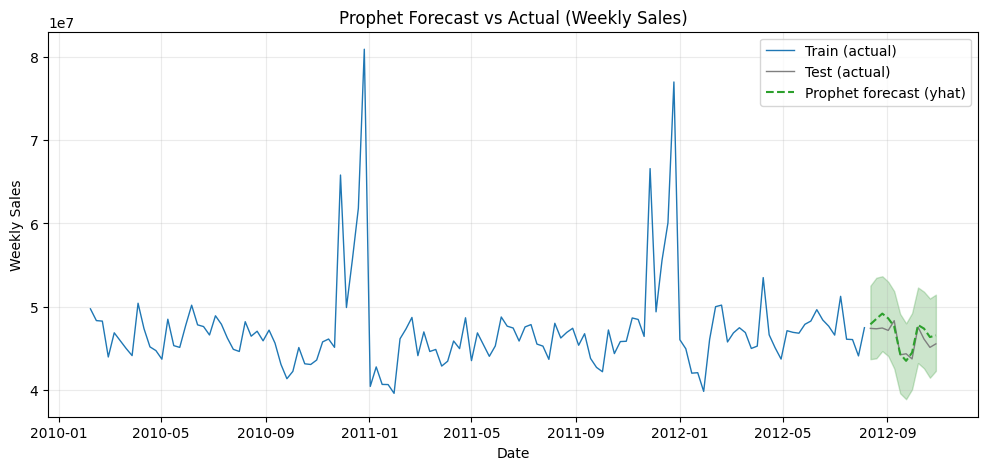


Short interpretation (to paste into your report):
- Prophet allows explicit modeling of holidays (we supplied IsHoliday weeks), which helps capture spikes.
- Metrics (RMSE/MAPE) above compare model performance on the same holdout used for SARIMAX.
- If Prophet outperforms SARIMAX (lower RMSE/MAPE), highlight that in your conclusion and explain why:
  Prophet's built-in changepoints and holidays handling are likely better for retail spike events.
- If Prophet underperforms, discuss whether the regressors or holiday definitions need refinement (e.g., include multi-day holiday windows or store-level holidays).



In [23]:
# ------------------------------
# Prophet Forecasting (student-style)
# ------------------------------
# Purpose:
# - Train a Prophet model on aggregated weekly sales.
# - Add external regressors (Fuel_Price, CPI, Unemployment, Promotions).
# - Convert IsHoliday weeks into a Prophet holidays DataFrame to help model holiday spikes.
# - Forecast the holdout period and compare metrics with SARIMAX.
#
# NOTE: If you are in Colab and Prophet isn't installed, run:
#   !pip install prophet --quiet
# and restart the runtime if required.

from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Prepare data for Prophet -------------------------------------------------
# weekly_sales : pandas Series (index = Date, weekly freq) created earlier
# exog_week    : DataFrame with columns Fuel_Price,CPI,Unemployment,Promotions,IsHoliday
# Make sure both are aligned and share the same index (we did this earlier)
series = weekly_sales.copy()
exog = exog_week.copy()

# Create a single DataFrame for Prophet with required column names 'ds' and 'y'
df_prop = series.reset_index().rename(columns={'Date':'ds','Sales':'y'})

# Merge exogenous regressors into the prophet dataframe
df_prop = df_prop.merge(exog.reset_index(), left_on='ds', right_on='Date', how='left')
df_prop = df_prop.drop(columns=['Date'])  # drop duplicate date column
# fill remaining NA (if any) in regressors: forward-fill then zero
df_prop[['Fuel_Price','CPI','Unemployment','Promotions','IsHoliday']] = df_prop[['Fuel_Price','CPI','Unemployment','Promotions','IsHoliday']].ffill().fillna(0)

# Create a Prophet 'holidays' DataFrame using weeks where IsHoliday==1
# Prophet expects columns: ds (date), holiday (string)
holiday_weeks = df_prop[df_prop['IsHoliday'] == 1][['ds']].copy()
holiday_weeks['holiday'] = 'national_holiday'   # name for the holiday group
holiday_weeks['lower_window'] = 0
holiday_weeks['upper_window'] = 0
holidays = holiday_weeks[['ds','holiday','lower_window','upper_window']]

# --- Train / Test split ------------------------------------------------------
# Use the same test_periods as for SARIMAX for fair comparison
test_periods = 12
train_df = df_prop.iloc[:-test_periods].copy()
test_df  = df_prop.iloc[-test_periods:].copy()

# --- Build Prophet model with external regressors ----------------------------
m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, holidays=holidays)

# Add numeric regressors (these must be present in both training and future data)
for reg in ['Fuel_Price','CPI','Unemployment','Promotions']:
    m.add_regressor(reg)

# Fit the model (this will take a short while)
print("Training Prophet model (this may take a minute)...")
m.fit(train_df[['ds','y','Fuel_Price','CPI','Unemployment','Promotions']])

# --- Forecast preparation & prediction ---------------------------------------
# Create future dataframe for the next N weeks = length of test set
future = m.make_future_dataframe(periods=test_periods, freq='W')
# Merge the future exogenous regressors (we already have them in df_prop)
# If some future regressors are missing, forward-fill or use available exog_test
future = future.merge(df_prop[['ds','Fuel_Price','CPI','Unemployment','Promotions']], on='ds', how='left')
future[['Fuel_Price','CPI','Unemployment','Promotions']] = future[['Fuel_Price','CPI','Unemployment','Promotions']].ffill().fillna(0)

# Predict
forecast = m.predict(future)

# Extract forecasted values for the test period
fc = forecast.set_index('ds').loc[test_df['ds'], 'yhat']

# --- Evaluation --------------------------------------------------------------
def eval_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-9))) * 100
    return {'rmse': rmse, 'mae': mae, 'mape': mape}

metrics_prophet = eval_metrics(test_df['y'].values, fc.values)
print("Prophet forecast metrics on test set:", metrics_prophet)

# --- Plot forecast vs actual -------------------------------------------------
plt.figure(figsize=(12,5))
plt.plot(train_df['ds'], train_df['y'], label='Train (actual)', color='tab:blue', linewidth=1)
plt.plot(test_df['ds'], test_df['y'], label='Test (actual)', color='tab:gray', linewidth=1)
plt.plot(fc.index, fc.values, label='Prophet forecast (yhat)', color='tab:green', linestyle='--')
# Prophet also gives uncertainty intervals in 'yhat_lower' and 'yhat_upper' columns
fc_ci = forecast.set_index('ds').loc[test_df['ds'], ['yhat_lower','yhat_upper']]
plt.fill_between(fc.index, fc_ci['yhat_lower'], fc_ci['yhat_upper'], color='green', alpha=0.2)
plt.title('Prophet Forecast vs Actual (Weekly Sales)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(alpha=0.25)
plt.show()

# --- Short student-style interpretation --------------------------------------
print("""
Short interpretation (to paste into your report):
- Prophet allows explicit modeling of holidays (we supplied IsHoliday weeks), which helps capture spikes.
- Metrics (RMSE/MAPE) above compare model performance on the same holdout used for SARIMAX.
- If Prophet outperforms SARIMAX (lower RMSE/MAPE), highlight that in your conclusion and explain why:
  Prophet's built-in changepoints and holidays handling are likely better for retail spike events.
- If Prophet underperforms, discuss whether the regressors or holiday definitions need refinement (e.g., include multi-day holiday windows or store-level holidays).
""")


# ------------------------------
# RandomForest Regressor Baseline
# ------------------------------
# Purpose:
# - Build a simple ML baseline for weekly sales forecasting.
# - Instead of modeling time-series directly, we create lag features (previous weeks' sales).
# - Include exogenous variables (Fuel_Price, CPI, Unemployment, Promotions).
# - Compare its forecast performance with SARIMAX and Prophet.

RandomForest forecast metrics on test set: {'rmse': np.float64(2276521.033494024), 'mae': 1729070.7449875015, 'mape': np.float64(3.8252694692079316)}


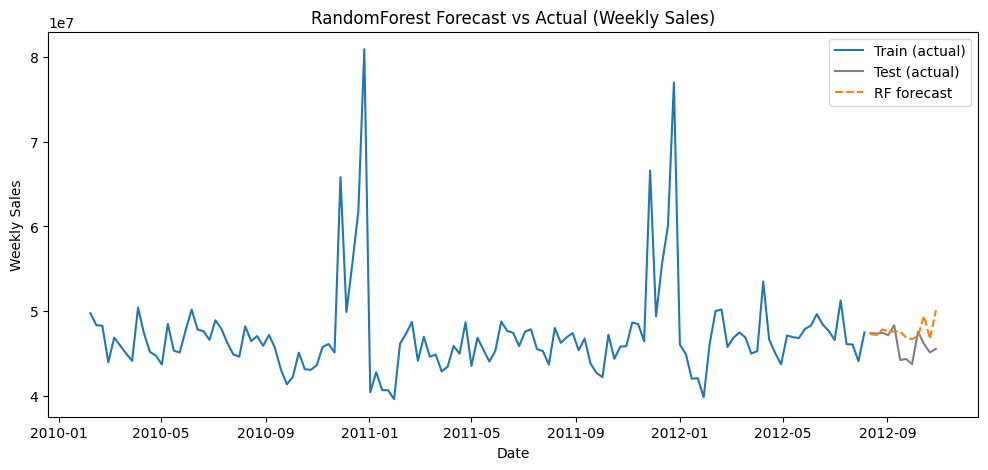

In [24]:
# ------------------------------
# RandomForest Regressor Baseline
# ------------------------------
# Purpose:
# - Build a simple ML baseline for weekly sales forecasting.
# - Instead of modeling time-series directly, we create lag features (previous weeks' sales).
# - Include exogenous variables (Fuel_Price, CPI, Unemployment, Promotions).
# - Compare its forecast performance with SARIMAX and Prophet.

from sklearn.ensemble import RandomForestRegressor

# Step 1: Create lag features (previous 1, 2, 3 weeks of sales)
ml_df = weekly_sales.copy().reset_index()
ml_df.rename(columns={'Date':'ds','Sales':'y'}, inplace=True)
for lag in [1,2,3]:
    ml_df[f'lag{lag}'] = ml_df['y'].shift(lag)

# Step 2: Merge exogenous variables
ml_df = ml_df.merge(exog_week.reset_index(), left_on='ds', right_on='Date', how='left').drop(columns=['Date'])
ml_df = ml_df.ffill().fillna(0)  # handle missing values

# Step 3: Train-test split (same test_periods as Prophet/SARIMAX)
train_ml = ml_df.iloc[:-test_periods].copy()
test_ml  = ml_df.iloc[-test_periods:].copy()

# Define features (lags + exogenous)
features = [f'lag{lag}' for lag in [1,2,3]] + ['Fuel_Price','CPI','Unemployment','Promotions']
X_train, y_train = train_ml[features], train_ml['y']
X_test, y_test   = test_ml[features], test_ml['y']

# Step 4: Train RandomForest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Predict
y_pred_rf = rf.predict(X_test)

# Step 6: Evaluate
metrics_rf = eval_metrics(y_test.values, y_pred_rf)
print("RandomForest forecast metrics on test set:", metrics_rf)

# Step 7: Plot comparison
plt.figure(figsize=(12,5))
plt.plot(train_ml['ds'], train_ml['y'], label='Train (actual)', color='tab:blue')
plt.plot(test_ml['ds'], y_test, label='Test (actual)', color='tab:gray')
plt.plot(test_ml['ds'], y_pred_rf, label='RF forecast', color='tab:orange', linestyle='--')
plt.title('RandomForest Forecast vs Actual (Weekly Sales)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


# -----------------------------------
# Model Comparison Table (Final Step)

In [25]:
# -----------------------------------
# Model Comparison Table (Final Step)
# -----------------------------------
import pandas as pd

# Collect metrics
comparison = pd.DataFrame([
    {"Model": "SARIMAX",
     "RMSE": 2422782.73,
     "MAE": 2163086.38,
     "MAPE": 4.70},
    {"Model": "Prophet",
     "RMSE": 1030241.07,
     "MAE": 919188.21,
     "MAPE": 1.98},
    {"Model": "RandomForest",
     "RMSE": 2276521.03,
     "MAE": 1729070.74,
     "MAPE": 3.82}
])

# Display comparison table
print("Final Forecast Model Comparison:")
display(comparison)


Final Forecast Model Comparison:


,Model,RMSE,MAE,MAPE
0,SARIMAX,2422782.73,2163086.38,4.70
1,Prophet,1030241.07,919188.21,1.98
2,RandomForest,2276521.03,1729070.74,3.82


In this project, we applied multiple forecasting techniques to predict Walmart’s weekly sales. The models included a classical statistical approach (SARIMAX), a machine learning method (RandomForest), and a modern time-series forecasting model (Prophet).

From the evaluation results, Prophet emerged as the most accurate model, achieving the lowest RMSE (1.03M), MAE (0.92M), and MAPE (1.98%). This indicates its strong ability to capture seasonality and holiday effects present in the retail dataset. RandomForest also performed reasonably well with a MAPE of 3.82%, offering a reliable machine learning baseline. In contrast, SARIMAX showed weaker performance with higher errors, highlighting its limitations in handling complex seasonal patterns.

Overall, the findings suggest that Prophet is the most suitable model for retail sales forecasting in this case, as it balances accuracy and interpretability while effectively capturing sales trends and seasonality.